In [1]:
%matplotlib inline
import os
import time
from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
import pyFAI
import fabio
from pyFAI.test.utilstest import UtilsTest
from pyFAI.calibrant import CALIBRANT_FACTORY
from pyFAI.goniometer import SingleGeometry
print(f"Using pyFAI version: {pyFAI.version}")
start_time = time.perf_counter()

Using pyFAI version: 2023.5.0


# read folder

Lab6_output_image.cbf


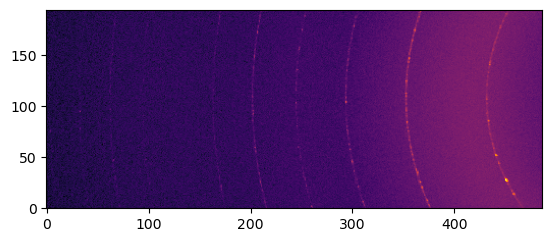

In [20]:
folder_path = r'C:Users\b_tassone\Desktop\Anjani\Python\Data_Reduction\Convert_and_calibrate'

# Loop through all files in the folder

filename = 'Lab6_output_image.cbf'
# Open the cbs file and read the image data
frame = fabio.open(filename).data
# Do something with the image data here

# and now display the image
ax = jupyter.display(frame)
print (filename)

In [11]:
# This allow to measure approximatively the position of the beam center ...
x = 600 # x-coordinate of the beam-center in pixels
y = 100 # y-coordinate of the beam-center in pixels
d = 150 # This is the distance in mm (unit used by Fit2d)
wl = 0.826565e-10 # Equivalent to 15 keV 
tilt = 25 

In [12]:
import pyFAI

# Definition of the detector and of the calibrant:
pilatus = pyFAI.detector_factory("Pilatus100k")
calibrant = pyFAI.calibrant.CALIBRANT_FACTORY("LaB6")
calibrant.wavelength = wl  # You need to define 'wl' before using it


In [13]:
# Set the guessed geometry
initial = pyFAI.geometry.Geometry(detector=pilatus, wavelength=wl)
initial.setFit2D(d,x,y,tilt)
initial

Detector Pilatus 100k	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 8.265650e-11 m
SampleDetDist= 1.359462e-01 m	PONI= 1.720000e-02, 3.980726e-02 m	rot1=-0.436332  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 150.000 mm	Center: x=600.000, y=100.000 pix	Tilt= 25.000° tiltPlanRotation= 0.000° 𝛌= 0.827Å

In [14]:
# The SingleGeometry object (from goniometer) allows to extract automatically ring and calibrate
sg = SingleGeometry(filename, frame, calibrant=calibrant, detector=pilatus, geometry=initial)
sg.extract_cp(max_rings=1)

ControlPoints instance containing 1 group of point:
LaB6 Calibrant with 86 reflections at wavelength 8.26565e-11
Containing 1 groups of points:
# b ring 0: 74 points

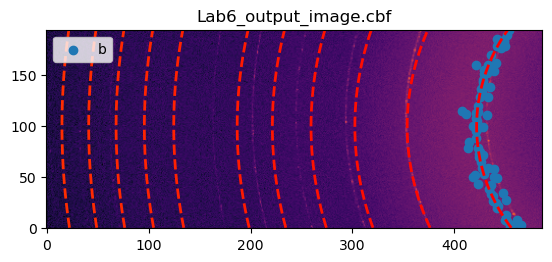

In [15]:
#Control point and rings do not overlap well initially (this was a guessed geometry)
ax = jupyter.display(sg=sg)

In [16]:
# Refine the geometry ... here in SAXS geometry, the rotation is fixed in orthogonal setup
sg.geometry_refinement.refine2(fix=["rot1", "rot2", "rot3", "wavelength"])
sg.get_ai()

Detector Pilatus 100k	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 8.265650e-11 m
SampleDetDist= 7.420181e+00 m	PONI= 7.555936e-02, -1.720000e+00 m	rot1=-0.436332  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 8187.263 mm	Center: x=10116.785, y=439.299 pix	Tilt= 25.000° tiltPlanRotation= 0.000° 𝛌= 0.827Å

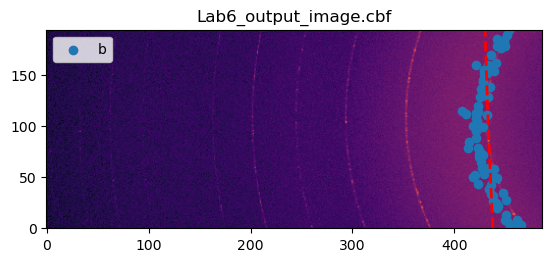

In [17]:
ax = jupyter.display(sg=sg)

In [18]:
#Save the geometry obtained
sg.geometry_refinement.save("Autoxidation_august_2023.poni")
with open("Autoxidation_august_2023.poni") as f:
    print(f.read())

# Nota: C-Order, 1 refers to the Y axis, 2 to the X axis 
# Calibration done at Wed Dec  6 19:17:01 2023
poni_version: 2
Detector: Pilatus100k
Detector_config: {}
Distance: 7.420180568698616
Poni1: 0.07555935991618455
Poni2: -1.7199999999999998
Rot1: -0.43633231299858244
Rot2: 0.0
Rot3: 0.0
Wavelength: 8.26565e-11



In [19]:
#Use the geometry to perform an azimuthal integration
ai = sg.get_ai()
res = ai.integrate1d(frame, 1000)
ax = jupyter.plot1d(res,calibrant=behenate)
#ax = jupyter.plot1d(res, calibrant=behenate) 
ax.set_xlim([0.5, 3])
ax.set_ylim([0, 200])
#plt.semilogy(res.radial, res.intensity, label=filename)

NameError: name 'behenate' is not defined